### Exercise:
Use keras mnist dataset from https://keras.io/datasets/ to build a neural network. Figure out,
 - 1. Optiomal number of hidden layers and neurons in each hidden layer that can give you best accuracy
 - 2. Optional accuracy score

In [ ]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the pixel values 

In [ ]:
# Reshape the data for Dense layers
x_train = x_train.reshape(-1, 28 * 28) # Flatten the 28x28 images to a 784 vector for Dense layers  
x_test = x_test.reshape(-1, 28 * 28)   # Flatten the 28x28 images to a 784 vector for Dense layers

In [7]:
# Define a function to create a model
def create_model(hidden_layers, neurons_per_layer):
    model = keras.Sequential([keras.layers.InputLayer(input_shape=(28*28,))])
    for neurons in neurons_per_layer:
        model.add(keras.layers.Dense(neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
from sklearn.model_selection import ParameterGrid
# Define the hyperparameter grid
hidden_layer_options = [1, 2, 3]
neurons_options = [[128], [128, 64], [256, 128, 64]]
param_grid = list(ParameterGrid({'hidden_layers': hidden_layer_options, 'neurons_per_layer': neurons_options}))

param_grid

[{'hidden_layers': 1, 'neurons_per_layer': [128]},
 {'hidden_layers': 1, 'neurons_per_layer': [128, 64]},
 {'hidden_layers': 1, 'neurons_per_layer': [256, 128, 64]},
 {'hidden_layers': 2, 'neurons_per_layer': [128]},
 {'hidden_layers': 2, 'neurons_per_layer': [128, 64]},
 {'hidden_layers': 2, 'neurons_per_layer': [256, 128, 64]},
 {'hidden_layers': 3, 'neurons_per_layer': [128]},
 {'hidden_layers': 3, 'neurons_per_layer': [128, 64]},
 {'hidden_layers': 3, 'neurons_per_layer': [256, 128, 64]}]

In [14]:
# Train and evaluate different models
best_model = None
best_accuracy = 0
history_dict = {}

for params in param_grid:
    print(f"Training with layers: {params['neurons_per_layer']}")
    model = create_model(params['hidden_layers'], params['neurons_per_layer'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    accuracy = max(history.history['val_accuracy'])
    history_dict[str(params['neurons_per_layer'])] = history.history
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = params
        
print(f"Best model configuration: {best_params}, Accuracy: {best_accuracy:.4f}")

Training with layers: [128]


c:\Workspace\MyProjects\DeepLearning\venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training with layers: [128, 64]
Training with layers: [256, 128, 64]
Training with layers: [128]
Training with layers: [128, 64]
Training with layers: [256, 128, 64]
Training with layers: [128]
Training with layers: [128, 64]
Training with layers: [256, 128, 64]
Best model configuration: {'hidden_layers': 2, 'neurons_per_layer': [256, 128, 64]}, Accuracy: 0.9832


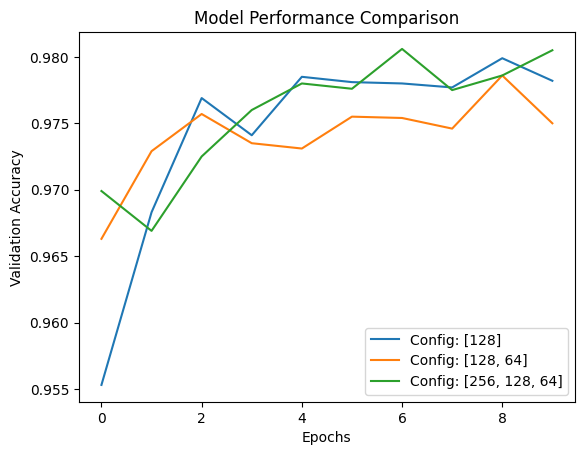

In [15]:
# Plot training history
for config, history in history_dict.items():
    plt.plot(history['val_accuracy'], label=f'Config: {config}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Model Performance Comparison')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


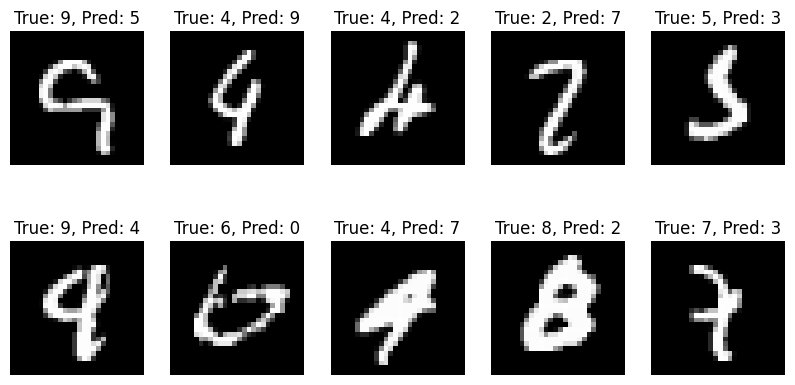

In [22]:
# Visualizing some misclassified images
predictions = best_model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
misclassified_idx = np.where(y_pred != y_test)[0][:10]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[misclassified_idx[i]].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {y_test[misclassified_idx[i]]}, Pred: {y_pred[misclassified_idx[i]]}')
    ax.axis('off')
plt.show()